# What are Hashtables ?


     1) Hashtables are an array that links a key to a specific data value(s), where each key is unique.
    
     2) They are data structure that efficiently implements search/lookup operations.
    
     3) It aims to divide the whole search space into well-defined regions, so we don’t have to search linearly through the entire collection to find an element. 

# How do they work ?

     1) Entire search space is divided into sections called Buckets. Each bucket has a corresponding Index.

     2) Keys are converted to Indexes using a Hash-Function.

     3) The (Key, Value) pairs are then stored in the appropriate bucket.

<div>
<img src="hfunction.png" width="600"/>
</div>

# Why do we need them?

     1) Drastically speed up insert, delete and search operations.
     
     2) Normal linear search takes O(N) time. Not good for large datasets.
     
     3) Since search space is divided into buckets, Hashtables take approximately O(1) time to search.

In [30]:
import ipywidgets as widgets
import random

def create_empty_hash_table(n):
    """Creates hashtable with n empty buckets"""
    return [[] for x in range(n)]

# def bad_func(key):
#     """Takes a key as an input and returns the appropriate index"""
#     wordtoindex = {"a": 0, "b": 1, "c": 2, "d": 3, "e": 4, "f": 5, "g": 6, "h": 7, "i": 8, "j": 9,
#                   "k": 10 , "l": 11, "m": 12, "n": 13, "o": 14, "p": 15, "q": 16, "r": 17, "s": 18,
#                    "t": 19, "u": 20, "v": 21, "w": 22, "x": 23, "y":24, "z":25}
#     if key[0].isnumeric():
#         return int(key[0])
#     return wordtoindex[key[0].lower()]

def good_func(key, n):
    h = 0
    for c in key:
        h = h*31 + ord(c)
    return h%n

# def htable_put(table, key, value):
#     """Inserts (username, pwd) tuple in appropriate buckets"""
#     bucket = table[bad_func(key)]
#     bucket.append((key, value))
    
def htable_put_2(table, key, value):
    """Inserts (username, pwd) tuple in appropriate buckets"""
    bucket = table[good_func(key, s.value)]
    bucket.append((key, value))

# def populate_hashtable(table, users):
#     """Iterates through a list of (username, pwd) tuples and places them in appropriate buckets"""
#     for username, pwd in users:
#         htable_put(table, username, pwd)
#     return table

def populate_hashtable_2(table, users):
    """Iterates through a list of (username, pwd) tuples and places them in appropriate buckets"""
    for username, pwd in users:
        htable_put_2(table, username, pwd)
    return table
    
# def htable_search(table, key):
#     """Searches a specific bucket in the hashtable and returns (username, pwd) tuple"""
#     bucket = table[bad_func(key)]
#     return linear_search(bucket, key)

def htable_search_2(table, key):
    """Searches a specific bucket in the hashtable and returns (username, pwd) tuple"""
    bucket = table[good_func(key, s.value)]
    return linear_search(bucket, key)

def linear_search(users, key):
    """Basic linear search which searches a list of names and returns (username, pwd) tuple"""
    for username, pwd in users:
        if username == key:
            return (username, pwd)

def read_users():
    users = list()
    with open('data_users.csv') as f:
        f.readline()
        data = f.read().split('\n')
        for user in data:
            username, password = user.split(',')
            users.append((username, password))
        return users
users = read_users()

## Selecting a random username to search.

In [45]:
user_to_search = users[-random.randint(0,1000)][0]
user_to_search

'laciberneticauqVZYwz2CA'

## Basic Linear search. Takes a lot of time 😔

In [46]:
%%time 
t = [linear_search(users, user_to_search) for i in range(10000)]

CPU times: user 2.78 s, sys: 8.67 ms, total: 2.79 s
Wall time: 2.79 s


## Lets try searching using Hashtables with custom bucket size.

In [47]:
s = widgets.IntSlider(
    value=26,
    min=1,
    max=1000,
    step=1,
    description='Buckets: ',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    layout=widgets.Layout(width='800px')
)
s

IntSlider(value=26, description='Buckets: ', layout=Layout(width='800px'), max=1000, min=1)

In [56]:
table = create_empty_hash_table(s.value)
table = populate_hashtable_2(table, users)

In [57]:
%%time 
tym = [htable_search_2(table, user_to_search) for i in range(50000)]

CPU times: user 1.71 s, sys: 24 ms, total: 1.73 s
Wall time: 1.74 s


In [1]:
x1 = [145, 691, 1390, 2050, 2760]
x2 = [28.3, 110, 213, 312, 408]

y = [10000, 50000, 100000, 150000, 200000]

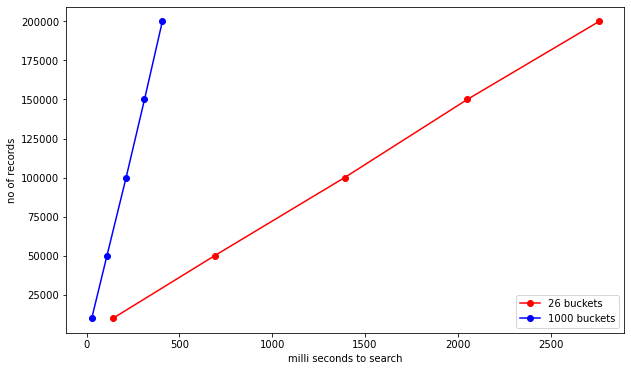

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(x1, y, label='26 buckets', marker='o', color='red')
plt.plot(x2, y, label='1000 buckets', marker='o', color='blue')
plt.xlabel('milli seconds to search')
plt.ylabel('no of records')
plt.legend()
plt.show()